<a href="https://colab.research.google.com/github/amycelliott/DMP_LP_2022/blob/main/DMP_Learning_Program__2022_Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Help / Notes

I'm new to Pandas, so the below is a way to search and see what is there.  This can be used to evaluate some of the data.  One of the examples has me using data frames, so I used that as the example of how to drill down.

dr(pd) <-- List of Everything

dr(pd.DataFrame) <-- List of what you can do with a Data Frame


In [2]:
import pandas as pd

# This will get an overview of what can be done in Pandas
# dir(pd)

# To drill down to the next level of Pandas - DataFrames for example
dir(pd.DataFrame)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmo

# Dependencies


*  Basically load what's needed (I only loaded what I knew I would use)
*  Test and verify you are running the right version of Pandas



See this website for more detail: https://colab.research.google.com/gist/pimlock/91e0021e53f24ea7e1244829e5235712/loading-data-into-dataframe.ipynb#scrollTo=pJLjOxlmF4iG

In [ ]:
%%capture

!pip install -U pandas~=1.2.4

# required only when reading Excel files
!pip install -U xlrd~=1.2.0

# plotly is used for simple visualizations.
!pip install -U plotly

In [ ]:
# verify pandas version (this notebook requires pandas=1.2.0 or higher)
import pandas as pd

# pd.show_versions()

if pd.__version__ < "1.2.0":
  raise Exception("This notebook requires pandas version to be > 1.2.0. "
    f"pandas version in this notebook is {pd.__version__}. "
    "If you run into this issue, you will need to restart the runtime "
    "selecting 'Runtime -> Restart and run all'"
  )

# Logging

Not sure, but this could be helpful...

In [ ]:
import logging, sys

logging.basicConfig(
    format="%(asctime)s.%(msecs)03dZ - %(levelname)s - %(name)s - %(message)s",
    datefmt="%Y-%m-%dT%H:%M:%S",
    level=logging.INFO,
    stream=sys.stdout
)

logger = logging.getLogger(__name__)

logging.getLogger('botocore').setLevel(logging.INFO)
logging.getLogger('fsspec').setLevel(logging.DEBUG)

# Import Files 

**Step 1: Import from GitHub**

Notes

I read that we need to use the URL to raw content, I saw that you can just put ?raw=true at the end of the url.  It appeared to work when I looked in the browser.


All Data is in this file
https://github.com/amycelliott/DMP_LP_2022/blob/main/files/World_Energy_Consumption.csv?raw=true

Just basic fields for Region
https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Regions_Basic_Fields.csv?raw=true

Just basic fields for Countries
https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Countries_Basic_Fields.csv?raw=true

In [ ]:
from tempfile import mkdtemp
from urllib.request import urlretrieve

tmp_dir = mkdtemp()

# CSV to load from disk
# Upload Region Basic Fields
region_basic_csv_path = f"{tmp_dir}/Regions_Basic_Fields.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Regions_Basic_Fields.csv?raw=true", region_basic_csv_path)
logger.info(f"Downloaded sample CSV file to {region_basic_csv_path}")

# Upload Countries Basic Fields
countries_basic_csv_path = f"{tmp_dir}/Countries_Basic_Fields.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Countries_Basic_Fields.csv?raw=true", countries_basic_csv_path)
logger.info(f"Downloaded sample CSV file to {countries_basic_csv_path}")


# Upload All Data
all_data_csv_path = f"{tmp_dir}/world_energy_consumption_all.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/World_Energy_Consumption.csv?raw=true", all_data_csv_path)
logger.info(f"Downloaded sample CSV file to {all_data_csv_path}")

**Step 2: Load CSV For Region Basic Data**

Time to make sure we can pull the data from the Regions Basic Fields.

Field names: country,year,energy_per_gdp,energy_per_capita,per_capita_electricity,population,primary_energy_consumption,gdp

In [ ]:
import pandas as pd
import numpy as np

df_region_basic = pd.read_csv(
    region_basic_csv_path, 
    # if your dataset doesn't have column names in the first row, you need to specify them like this
    #header=0, names=["country", "year", "energy_per_gdp", "energy_per_capita", "per_capita_electricity", "population", "primary_energy_consumption", "gdp"]
)

df_region_basic.info()

# after loading, we can explore the data in all different ways pandas support
# No need to do this yet
# df_region_basic = df_region_basic.sort_values('year', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     1528 non-null   object 
 1   year                        1528 non-null   int64  
 2   energy_per_gdp              0 non-null      float64
 3   energy_per_capita           165 non-null    float64
 4   per_capita_electricity      105 non-null    float64
 5   population                  225 non-null    float64
 6   primary_energy_consumption  1156 non-null   float64
 7   gdp                         0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 95.6+ KB


**Step 3: Load CSV For Country Basic Data**

In [ ]:
import pandas as pd
import numpy as np

df_country_basic = pd.read_csv(
    countries_basic_csv_path, 
    # if your dataset doesn't have column names in the first row, you need to specify them like this
    #header=0, names=["iso_code","country", "year", "energy_per_gdp", "energy_per_capita", "per_capita_electricity", "population", "primary_energy_consumption", "gdp"]
)

df_country_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15630 entries, 0 to 15629
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    15630 non-null  object 
 1   country                     15630 non-null  object 
 2   year                        15630 non-null  int64  
 3   energy_per_gdp              6887 non-null   float64
 4   energy_per_capita           8833 non-null   float64
 5   per_capita_electricity      5374 non-null   float64
 6   population                  15411 non-null  float64
 7   primary_energy_consumption  8916 non-null   float64
 8   gdp                         10366 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
import pandas as pd
import numpy as np

df_all_data = pd.read_csv(
    all_data_csv_path, 
    # if your dataset doesn't have column names in the first row, you need to specify them like this
    #header=0, names=["iso_code","country", "year", "energy_per_gdp", "energy_per_capita", "per_capita_electricity", "population", "primary_energy_consumption", "gdp"]
)

df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


# Evaluate the Data


Try to understand the min and max dates for each country
Source: https://www.geeksforgeeks.org/pandas-groupby-one-column-and-get-mean-min-and-max-values/

In [ ]:
# use group by function with aggreagation to get min/max values

all_data_agg_year = df_all_data.groupby('country').agg({'year': ['min', 'max','count']})

# Sort by max year desc 

# NEED TO FIX BELOW ERROR, this might help: https://stackoverflow.com/questions/42252273/python-pandas-sorting-after-groupby-and-aggregate
# I'm done for the day and will come back to this later.
#all_data_agg_year = all_data_agg_year.sort_values(by='year', ascending=False)

print(all_data_agg_year)

                year            
                 min   max count
country                         
Afghanistan     1900  2019   120
Africa          1900  2019   120
Albania         1900  2019   120
Algeria         1900  2019   120
American Samoa  1980  2019    40
...              ...   ...   ...
World           1900  2020   121
Yemen           1970  2019    50
Yugoslavia      1900  2016   117
Zambia          1900  2019   120
Zimbabwe        1900  2019   120

[242 rows x 3 columns]


# **Correlation basic region data**


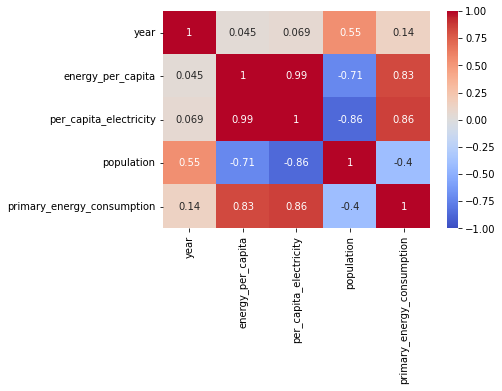

In [ ]:
import matplotlib.pyplot as mp

import seaborn as sb

#drop columns that contain no values
df_region_basic_drop = df_region_basic.drop(['energy_per_gdp','gdp'], axis=1)
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

df_region_basic_drop.corr()
  
sb.heatmap(df_region_basic_drop.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


# Correlation - country data

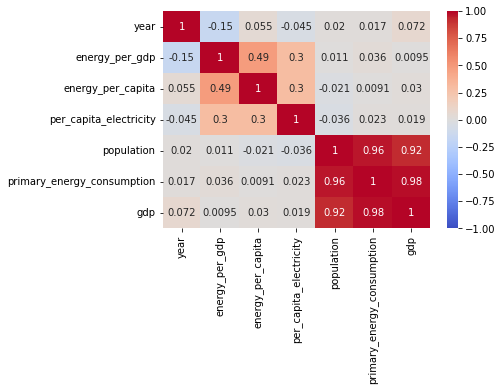

In [ ]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

df_country_basic.corr()
  
sb.heatmap(df_country_basic.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Energy consumption worldwide since 1900

In [ ]:
year_plt = df_all_data.groupby('year')[['energy_per_capita','population','primary_energy_consumption']].sum()
display(year_plt)

,energy_per_capita,population,primary_energy_consumption
year,,,
1900,0.000,3.752218e+09,0.000
1901,0.000,3.130448e+09,0.000
1902,0.000,3.152393e+09,0.000
1903,0.000,3.174763e+09,0.000
1904,0.000,3.197334e+09,0.000
...,...,...,...
2016,7332147.946,1.724308e+10,476124.282
2017,3678183.705,1.741803e+10,467018.352
2018,3698476.648,1.761886e+10,480191.058
